<a href="https://colab.research.google.com/github/leandrolrs18/ClassificacaoPecaDefeituosas/blob/main/Pe%C3%A7asDefeituosas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Descrição do dataset**

Link do código : ***https://www.kaggle.com/mcahitgamsz/product-image-for-quality-inspection-scv-acc-99***


> "Este conjunto de dados é do produto de manufatura de fundição. A fundição é um processo de fabricação em que um material líquido é geralmente derramado em um molde, que contém uma cavidade oca com o formato desejado, e depois pode solidificar.
O motivo para coletar esses dados são defeitos de fundição.
O defeito de fundição é uma irregularidade indesejada em um processo de fundição de metal.
Existem muitos tipos de defeitos na fundição, como furos de sopro, furos, rebarbas, defeitos de contração, defeitos de material do molde, defeitos de metal vazado, defeitos metalúrgicos, etc.
Defeitos são indesejáveis ​​na indústria de fundição. Para a remoção deste produto defeituoso, todas as indústrias contam com seu departamento de inspeção de qualidade. Mas o principal problema é que esse processo de inspeção é feito manualmente. É um processo muito demorado e, devido à precisão humana, não é 100% preciso. Isso pode ser devido à rejeição de todo o pedido. Portanto, isso cria um grande prejuízo para a empresa. 

> Decidimos automatizar o processo de inspeção e, para isso, precisamos fazer um modelo de classificação de aprendizado profundo para este problema." 





**Importando bibliotecas**

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
import time 
import os 
from IPython.display import clear_output 
from google.colab.patches import cv2_imshow

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve, precision_score,  f1_score, recall_score

**Permitindo acesso e acessando a pasta de fotos do googleDrive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/2021.1/IA aplicado/casting_data
%pwd

/content/drive/My Drive/2021.1/IA aplicado/casting_data


'/content/drive/My Drive/2021.1/IA aplicado/casting_data'

In [ ]:
sample_size = 3000 
width = 15 
height = 15

In [ ]:
files = ['def_front', 'ok_front']
adress = '/content/drive/MyDrive/2021.1/IA aplicado/casting_data/train/{}' 
data_train = {}
for f in files:
    data_train[f]=[]
for col in files:
    os.chdir(adress.format(col))                                                  #O método Python chdir () muda o diretório de trabalho atual para o caminho fornecido. 
    for i in os.listdir(os.getcwd()):                                             #O método listdir () do Python retorna uma lista contendo os nomes das entradas no diretório fornecido por path.
        if i.endswith('.jpeg'):
            data_train[col].append(i)                                             # adiciona a lista o caminho da imagem
print(data_train['def_front'])

['cast_def_0_7106.jpeg', 'cast_def_0_6443.jpeg', 'cast_def_0_91.jpeg', 'cast_def_0_5362.jpeg', 'cast_def_0_7898.jpeg', 'cast_def_0_7592.jpeg', 'cast_def_0_3073.jpeg', 'cast_def_0_1179.jpeg', 'cast_def_0_9408.jpeg', 'cast_def_0_1860.jpeg', 'cast_def_0_7664.jpeg', 'cast_def_0_3707.jpeg', 'cast_def_0_3785.jpeg', 'cast_def_0_3320.jpeg', 'cast_def_0_5252.jpeg', 'cast_def_0_5459.jpeg', 'cast_def_0_1697.jpeg', 'cast_def_0_5388.jpeg', 'cast_def_0_6234.jpeg', 'cast_def_0_3105.jpeg', 'cast_def_0_4937.jpeg', 'cast_def_0_5525.jpeg', 'cast_def_0_2861.jpeg', 'cast_def_0_9378.jpeg', 'cast_def_0_3583.jpeg', 'cast_def_0_4450.jpeg', 'cast_def_0_2860.jpeg', 'cast_def_0_4385.jpeg', 'cast_def_0_7888.jpeg', 'cast_def_0_8069.jpeg', 'cast_def_0_7002.jpeg', 'cast_def_0_1811.jpeg', 'cast_def_0_3671.jpeg', 'cast_def_0_5775.jpeg', 'cast_def_0_6811.jpeg', 'cast_def_0_7144.jpeg', 'cast_def_0_9798.jpeg', 'cast_def_0_3876.jpeg', 'cast_def_0_7125.jpeg', 'cast_def_0_4148.jpeg', 'cast_def_0_7325.jpeg', 'cast_def_0_9500.

In [ ]:
files = ['def_front', 'ok_front']
adress = '/content/drive/MyDrive/2021.1/IA aplicado/casting_data/test/{}'
data_test = {}
for f in files:
    data_test[f]=[]
for col in files:
    os.chdir(adress.format(col))
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpeg'):
            data_test[col].append(i)

[3758, 2875]


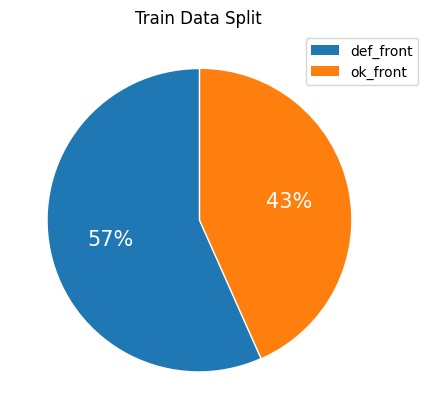

In [ ]:
sizes = [len(data_train['def_front']), len(data_train['ok_front'])]
print(sizes)
plt.figure(figsize=(10,5), dpi=100)

plt.pie(x=sizes,autopct='%1.0f%%',shadow=False, textprops={'color':"w","fontsize":15}, startangle=90,explode=(0,.01))
plt.legend(files,bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Train Data Split")
plt.show()

**Cria uma lista com imagens**

In [ ]:
start = time.time() 
image_data_train = []
image_target_train = []

for title in files:
    os.chdir('/content/drive/MyDrive/2021.1/IA aplicado/casting_data/train/{}'.format(title))                    #muda diretório concatenado 
    counter = 0
    for i in data_train[title]:
        img = cv2.imread(i,0)                                                                                   #ler imagem
        image_data_train.append(cv2.resize(img,(width, height)).flatten())                                      #Retorne uma cópia da matriz recolhida em uma dimensão
        image_target_train.append(title)
        counter += 1
        if counter == sample_size:
            break
    clear_output(wait=True)
    print("Compiled Class",title)
calculate_time = time.time() - start    
print("Calculate Time",round(calculate_time,5))


Compiled Class ok_front
Calculate Time 12.18293


In [ ]:
start = time.time()
image_data_test = []
image_target_test = []

for title in files:
    os.chdir('/content/drive/MyDrive/2021.1/IA aplicado/casting_data/test/{}'.format(title))
    counter = 0
    for i in data_test[title]:
        img = cv2.imread(i,0)
        image_data_test.append(cv2.resize(img,(width, height)).flatten())
        image_target_test.append(title)
        counter += 1
        if counter == sample_size:
            break
    clear_output(wait=True)
    print("Compiled Class",title)
calculate_time = time.time() - start    
print("Calculate Time",round(calculate_time,5))
#print(image_data_test)
print(image_data_test[0])




Compiled Class ok_front
Calculate Time 1.51427
[160 159 161 165 164 164 169 171 178 182 181 183 185 184 183 158 165 159
 159 151 221 212 203 201 193 209 183 181 184 185 157 157 154 196 217 224
 214 216 203 197 200 199 183 183 185 155 153 107 186 210 247 204  70 179
 220 200 200 187 183 186 153 120 174 187  48  28  23  24  22  12 197 181
 189 185 182 148  97 170 187  29  24  71 165 179  26  10 216 194 113 182
 134 156 166  56  13  11 100 100  30  19  16 168 187 193 181 124 126 124
  14  28  10 157 142  58  17  20 213 202 193 179 127 127 112 100  14  12
  78 179  68  26  24 210 189 156 179 130  32 119 125 119  29  19  17  24
  22 109 197 180 175 176 140  88 121 123 125  38 154  89 211 230 223 203
 102 173 175 142 134  52 119 127 141 192 209 211 223 208 188 171 175 174
 145 142 133  71 122 124 176 189 189 203 109 166 171 172 174 144 144 142
 140 122  89  69  76 101 144 163 168 168 171 169 141 142 144 148 149 150
 148 151 154 157 162 166 170 169 169]


In [ ]:
image_data_train = np.array(image_data_train)                                      #cria um array
size_train = image_data_train.shape[0]
image_data_train.shape
print(image_data_train[0])

[183 186 189 190 191 192 192 192 192 189 191 192 192 187 184 183 184 186
 188 191 187  71 134  85 109 180 187 187 184 180 178 184 184 182 189 189
 191 186 120  96 106 149 179 180 180 180 181 176 184 180 191 204  93 107
 107 116 133 134 175 178 177 177 155 182 186 188  11  17  18  84 174 156
 134 162 176 174 166 183 187 170  13  20  18  21  28 113 138 117  78 170
 172 193 182 193  29  17 177  50  50  19  30 141 140 133 165 169 229 171
 198  15  14 111 119  76  17  22 203 170 190 157 164  82 106 105  14  13
 144 101 166  16  21 179 180 128 155 164  63  94 110 109  25  12   9  12
  20 166 178 171 116 149 165 142  96  98  98 105  20  28  18 172 176 163
 131 132 149 160 158  38  96  87  99  22   9 153 176 175 167 109 138 147
 159 157 145  27  88  92  82  89 111 133 178  99 131 144 144 157 154 153
 145  89  19  76  81  36  80 106 130 140 139 142 156 152 150 148 143 140
 126 122 123 129 137 139 137 139 138]


In [ ]:
image_data_test = np.array(image_data_test)
size_test = image_data_test.shape[0]
image_data_test.shape

(715, 225)

In [ ]:
print(image_target_train)
labels = LabelEncoder()                                                              #Codifique rótulos de destino com valor entre 0 e n_classes-1.
labels.fit(image_target_train)                                                       # codifica a etiqueta
print(image_target_train)

['def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front', 'def_front'

**Modificando a Escala: 1) pixels ficam na faixa de [0-1]. 2)  rótulos são 0 ou 1**

In [ ]:
train_images = image_data_train / 255.0
test_images = image_data_test / 255.0

train_labels = labels.transform(image_target_train)
test_labels = labels.transform(image_target_test)
print(train_labels)
print(train_images[0])

[0 0 0 ... 1 1 1]
[0.71764706 0.72941176 0.74117647 0.74509804 0.74901961 0.75294118
 0.75294118 0.75294118 0.75294118 0.74117647 0.74901961 0.75294118
 0.75294118 0.73333333 0.72156863 0.71764706 0.72156863 0.72941176
 0.7372549  0.74901961 0.73333333 0.27843137 0.5254902  0.33333333
 0.42745098 0.70588235 0.73333333 0.73333333 0.72156863 0.70588235
 0.69803922 0.72156863 0.72156863 0.71372549 0.74117647 0.74117647
 0.74901961 0.72941176 0.47058824 0.37647059 0.41568627 0.58431373
 0.70196078 0.70588235 0.70588235 0.70588235 0.70980392 0.69019608
 0.72156863 0.70588235 0.74901961 0.8        0.36470588 0.41960784
 0.41960784 0.45490196 0.52156863 0.5254902  0.68627451 0.69803922
 0.69411765 0.69411765 0.60784314 0.71372549 0.72941176 0.7372549
 0.04313725 0.06666667 0.07058824 0.32941176 0.68235294 0.61176471
 0.5254902  0.63529412 0.69019608 0.68235294 0.65098039 0.71764706
 0.73333333 0.66666667 0.05098039 0.07843137 0.07058824 0.08235294
 0.10980392 0.44313725 0.54117647 0.45882353 

**Gerando modelo e validando  pelo método de Classificador de regressão logística**

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Acc: 0.88
F1: 0.84
Recall: 0.86
Precision: 0.82


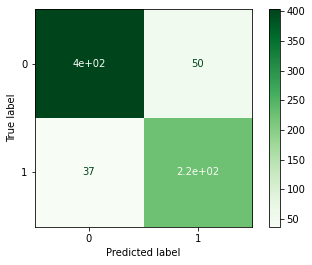

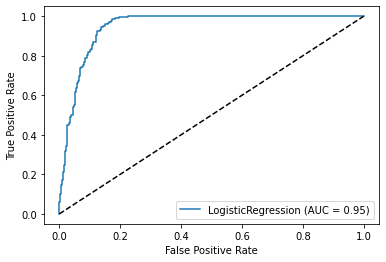

In [ ]:
model = LogisticRegression(max_iter=300)
model.fit(train_images, train_labels)                                                 #TREINAMENTO DO MODELO: Ajuste o modelo de acordo com os dados de treinamento fornecidos (x, y, peso)

y_pred = model.predict(test_images)
print(model)                                                   # PREDIÇÃO DO MODELO:  Prever rótulos de classe para amostras em X

print("Acc:",round(accuracy_score(test_labels,y_pred),2))
print("F1:",round(f1_score(test_labels,y_pred),2))
print("Recall:",round(recall_score(test_labels,y_pred),2))
print("Precision:",round(precision_score(test_labels,y_pred),2))




plot_confusion_matrix(model,test_images, test_labels, cmap='Greens')
plt.show()
plot_roc_curve(model,test_images, test_labels)
plt.plot([0,1],[0,1],'k--')
plt.show()

**Gerando modelo e validando  pelo método de Gaussian Naive Bayes**

Acc: 0.82
F1: 0.75
Recall: 0.74
Precision: 0.75


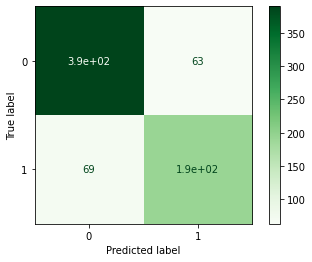

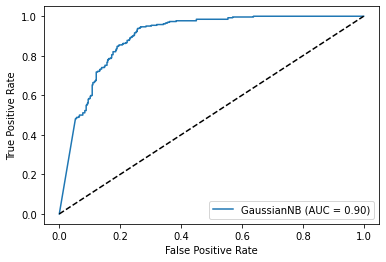

In [ ]:
model = GaussianNB()
model.fit(train_images, train_labels)

y_pred = model.predict(test_images)

print("Acc:",round(accuracy_score(test_labels,y_pred),2))
print("F1:",round(f1_score(test_labels,y_pred),2))
print("Recall:",round(recall_score(test_labels,y_pred),2))
print("Precision:",round(precision_score(test_labels,y_pred),2))


plot_confusion_matrix(model,test_images, test_labels, cmap='Greens')
plt.show()

plot_roc_curve(model,test_images, test_labels)
plt.plot([0,1],[0,1],'k--')
plt.show()

**Gerando modelo e validando  pelo método de Classificador por árvore de decisão**

Acc: 0.92
F1: 0.9
Recall: 0.92
Precision: 0.88


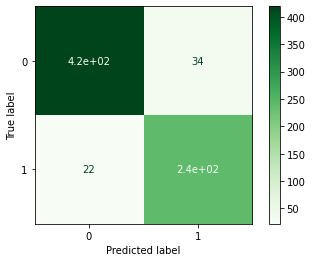

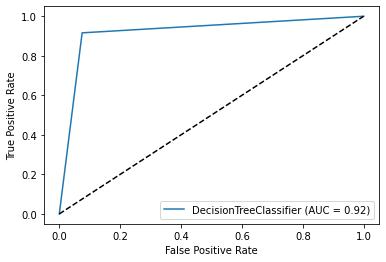

In [ ]:
model = DecisionTreeClassifier()
model.fit(train_images, train_labels)

y_pred = model.predict(test_images)

print("Acc:",round(accuracy_score(test_labels,y_pred),2))
print("F1:",round(f1_score(test_labels,y_pred),2))
print("Recall:",round(recall_score(test_labels,y_pred),2))
print("Precision:",round(precision_score(test_labels,y_pred),2))


plot_confusion_matrix(model,test_images, test_labels, cmap='Greens')
plt.show()

plot_roc_curve(model,test_images, test_labels)
plt.plot([0,1],[0,1],'k--')
plt.show()

**Gerando modelo e validando  pelo método de Classificador que implementa a votação de k-vizinhos mais próximos**

Acc: 0.98
F1: 0.98
Recall: 0.97
Precision: 0.98


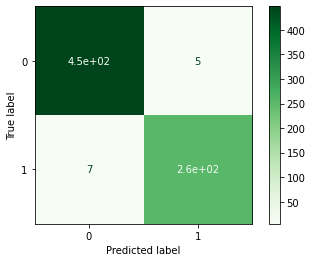

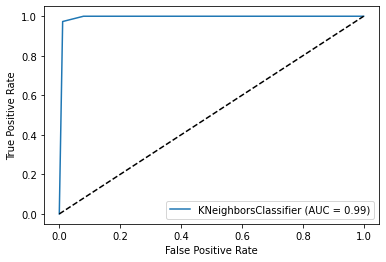

In [ ]:
model = KNeighborsClassifier(2)
model.fit(train_images, train_labels)

y_pred = model.predict(test_images)

print("Acc:",round(accuracy_score(test_labels,y_pred),2))
print("F1:",round(f1_score(test_labels,y_pred),2))
print("Recall:",round(recall_score(test_labels,y_pred),2))
print("Precision:",round(precision_score(test_labels,y_pred),2))


plot_confusion_matrix(model,test_images, test_labels, cmap='Greens')
plt.show()

plot_roc_curve(model,test_images, test_labels)
plt.plot([0,1],[0,1],'k--')
plt.show()

**Gerando modelo e validando  pelo método SVC**

Acc: 0.99
F1: 0.98
Recall: 1.0
Precision: 0.97


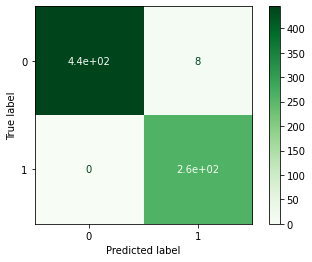

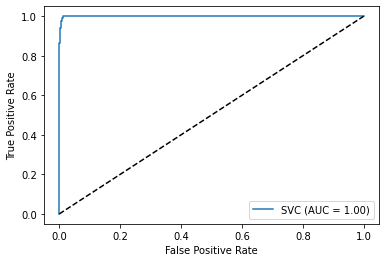

In [ ]:
model = SVC()
model.C = 100
model.fit(train_images, train_labels)

y_pred = model.predict(test_images)

print("Acc:",round(accuracy_score(test_labels,y_pred),2))
print("F1:",round(f1_score(test_labels,y_pred),2))
print("Recall:",round(recall_score(test_labels,y_pred),2))
print("Precision:",round(precision_score(test_labels,y_pred),2))


plot_confusion_matrix(model,test_images, test_labels, cmap='Greens')
plt.show()

plot_roc_curve(model,test_images, test_labels)
plt.plot([0,1],[0,1],'k--')
plt.show()

**Exibindo atuação do modelo nas imagens aletórias. o modelo é o último usado, o SVC**

In [ ]:
def Prediction(image):
    global model, width, height
    
    img = cv2.imread(image,0)
    img = cv2.resize(img,(width, height)).flatten() / 255.0
    
    pred = model.predict([img])                                                         
    
    if (pred==1):
        result = 'ok_front'
    else:
        result = 'def_front'
    

    
    return result

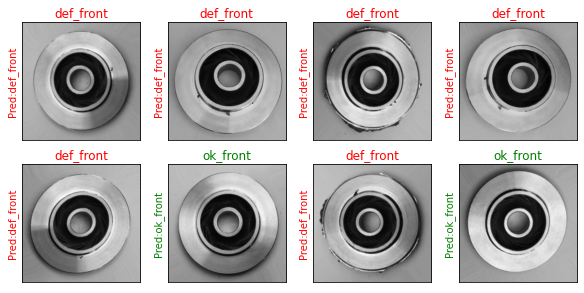

In [ ]:
plt.figure(figsize=(10,10))
for i in range(1,9):
    front = np.random.choice(['def_front','ok_front'])
    sample = np.random.choice(np.arange(1,200))
    os.chdir('/content/drive/MyDrive/2021.1/IA aplicado/casting_data/test/{}'.format(front))
    image = cv2.imread(data_test[front][sample],0)
    plt.subplot(4,4,i)
    plt.imshow(image,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    if front == 'ok_front':
        c = 'green'
    else:
        c = 'red'
    plt.title(front, color=c)
    plt.ylabel("Pred:{}".format(Prediction(data_test[front][sample])),color=c)
    
plt.show()